<a href="https://colab.research.google.com/github/ogunsolahabib/math-5300-regression/blob/main/Regression_Final_Project_Habib_Ogunsola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Regression Model:

Construct a model that best fit the given data performing regression Estimate corresponding parameters

Provide a 95% Confidence interval for each of the estimated parameters Use Hypothesis Testing to test the significance of Regression

2. Model Adequacy:

Perform Anova

Perform Residual Analysis

Perform Lack of fit test

Apply corresponding transformation to correct model inadequacies if any.

Perform Multicollinearity Analysis

Model Validation

Read chapter-11 and Validate your model Accordingly.

In [ ]:
data = read.csv("Financing Flows by Sector US.csv", encoding = "UTF-8")

In [ ]:
colnames(data)= c("industryName", "firmsCount", "dividends", "buyBacks", "equityIssuance", "equityChange", "equityChangeOfBook", "debtRepaid", "debtRaised", "debtChange", "debtChangePercent", "leaseDebtChange")

Some columns obviously are correlated so we will exclude them

In [ ]:
# data = subset(data, select = c("dividends", "buyBacks", "equityIssuance", "equityChange", "debtRepaid", "debtChange", "firmsCount"))

In [ ]:
data = subset(data, select = c("dividends", "equityChangeOfBook", "debtChangePercent", "buyBacks", "equityIssuance", "equityChange", "debtRepaid", "debtChange", "firmsCount"))

In [ ]:
# Add columns as global variables so I can access them later
list2env(as.list(data), envir = .GlobalEnv)

<environment: R_GlobalEnv>

In [ ]:
data

,dividends,equityChangeOfBook,debtChangePercent,buyBacks,equityIssuance,equityChange,debtRepaid,debtChange,firmsCount
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1059.36,-0.15,0.00,1952.84,226.69,-1726.14,4820.00,-74.38,57
2,10325.45,-0.09,0.05,15452.95,1830.18,-13622.77,35097.15,8701.89,70
3,503.10,0.00,-0.09,483.24,493.82,10.57,18227.48,-9836.38,25
4,1691.36,-0.07,-0.05,1886.78,138.30,-1748.48,11930.47,-912.92,38
5,5839.10,0.02,0.07,3034.18,5839.53,2805.35,90281.22,19831.11,34
6,705.75,-0.01,0.01,531.98,386.25,-145.74,6014.96,145.04,39
7,34903.05,-0.03,0.12,25724.00,1032.41,-24691.59,234071.50,322550.50,15
8,18260.63,-0.01,0.17,6382.25,1198.30,-5183.95,554628.33,91969.71,625
9,1374.50,-0.01,0.05,534.82,124.59,-410.23,3704.54,993.66,19


In [ ]:
first_model = lm(dividends ~ equityChangeOfBook + debtChangePercent + buyBacks + equityIssuance + equityChange + debtRepaid + debtChange, data=data )

In [ ]:
summary(first_model)


Call:
lm(formula = dividends ~ equityChangeOfBook + debtChangePercent + 
    buyBacks + equityIssuance + equityChange + debtRepaid + debtChange, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-23385  -3216  -1342   1449  25268 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.228e+03  8.363e+02   3.860 0.000219 ***
equityChangeOfBook  3.153e+03  2.422e+03   1.302 0.196337    
debtChangePercent   1.277e+04  1.079e+04   1.184 0.239757    
buyBacks           -1.822e+04  1.541e+05  -0.118 0.906147    
equityIssuance      1.822e+04  1.541e+05   0.118 0.906142    
equityChange       -1.822e+04  1.541e+05  -0.118 0.906146    
debtRepaid          3.125e-03  8.935e-04   3.498 0.000745 ***
debtChange          5.618e-02  1.706e-02   3.294 0.001436 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6536 on 86 degrees of freedom
Multiple R-squared:  0.5758,	Adjusted R-squared:  0.5412

The full model is: $$dividends = 3228 + 3153 * equityChangeOfBook + 12770 * debtChangePercent - 18220 * buyBacks + 18220 * equityIssuance - 18220 * equityChange + 0.003125 * debtRepaid + 0.05618 * debtChange
$$

some p-values are above 0.05 so those regressors may not be statistically significant towards contributing to the model:
- equityChangeOfBook
- buyBacks
- equityIssuance
- debtChangePercent

In [ ]:
second_model <- lm(dividends ~ debtRepaid + debtChange, data = data)
summary(second_model)


Call:
lm(formula = dividends ~ debtRepaid + debtChange, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6592  -5330  -3230   2287  30676 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.265e+03  8.309e+02   7.541 3.39e-11 ***
debtRepaid  5.164e-03  8.769e-04   5.889 6.45e-08 ***
debtChange  6.783e-02  1.923e-02   3.528 0.000659 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7876 on 91 degrees of freedom
Multiple R-squared:  0.3481,	Adjusted R-squared:  0.3338 
F-statistic:  24.3 on 2 and 91 DF,  p-value: 3.502e-09


Second model is:

$$ dividends = 6265 + 0.005164 * debtRepaid + 0.06783 * debtChange $$

In [ ]:
anova(first_model, second_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,86,3673335108,NA,NA,NA,NA
2,91,5644477174,-5,-1971142065,9.229663,4.622935e-07


anova result table suggests that second model with reduced regressors outperforms the first model since p-value here is less than 0.05 significance level

### Residual Plots for Second Model

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


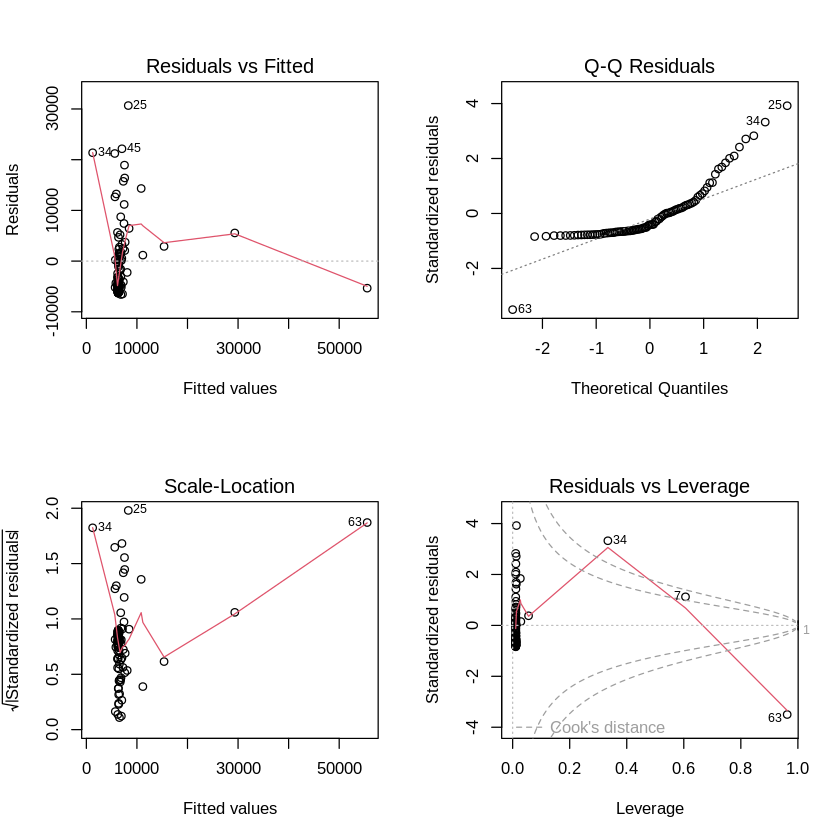

In [ ]:
par(mfrow = c(2,2))
plot(second_model)

Plots for residual analysis shows poor fit from:
- violation of normality assumption
- non constant variance or heteroscedasticity

**We** can apply logarithmic transformation to linearize the model

In [ ]:
third_model= lm(log(dividends) ~ log(debtRepaid)+ log(debtChange), data=data)

Warning message in log(debtChange):
“NaNs produced”


log transformation throws NaN warning due to non positive values in data. so let's replace them by shifting the data

In [ ]:
data$shifted_dividends <- data$dividends + abs(min(data$dividends)) + 1.1
data$shifted_debtRepaid <- data$debtRepaid + abs(min(data$debtRepaid)) + 1.1
data$shifted_debtChange <- data$debtChange + abs(min(data$debtChange)) + 1.1


In [ ]:
third_model= lm(log10(shifted_dividends) ~ log10(debtRepaid)+ log10(shifted_debtChange), data=data)

In [ ]:
summary(third_model)


Call:
lm(formula = log10(shifted_dividends) ~ log10(debtRepaid) + log10(shifted_debtChange), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1939 -0.2749  0.0982  0.3887  1.2092 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.9273     0.9876  -0.939    0.350    
log10(debtRepaid)           0.8413     0.1081   7.785 1.07e-11 ***
log10(shifted_debtChange)   0.1446     0.1452   0.996    0.322    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7428 on 91 degrees of freedom
Multiple R-squared:  0.4038,	Adjusted R-squared:  0.3907 
F-statistic: 30.82 on 2 and 91 DF,  p-value: 6.016e-11


The equation of the third model is:
$$ dividends = -0.9273 + 0.8413 * log10(\text{debtRepaid}) + 0.1446 * log10(\text{shifted_debtChange})
 $$

In [ ]:
# Store newly created columns as variables
list2env(as.list(data), envir = .GlobalEnv)

<environment: R_GlobalEnv>

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


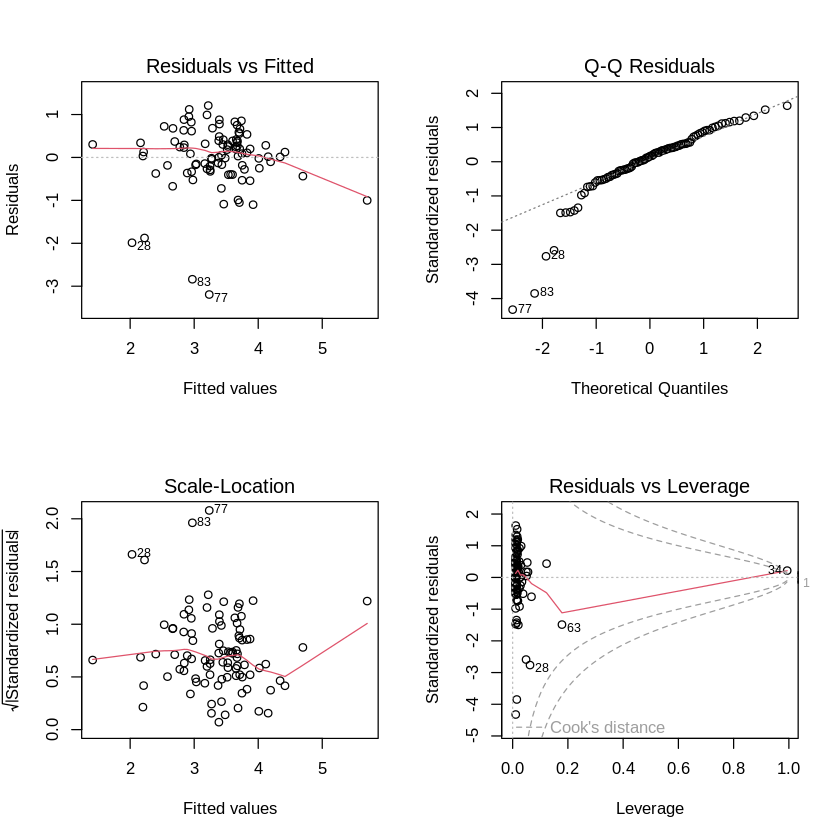

In [ ]:
# third model after log transformation
par(mfrow = c(2,2))
plot(third_model)

### Shapiro Wilk test

In [ ]:
library(MASS) # need for box-cox

shapiro.test(third_model$residuals)


	Shapiro-Wilk normality test

data:  third_model$residuals
W = 0.86564, p-value = 9.643e-08


p-value of shapiro wilk (3.139e-05) being less than 0.05 significance level indicates violation of normality, suggesting further transformation is neccessary

### Box-cox transformation

In [ ]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



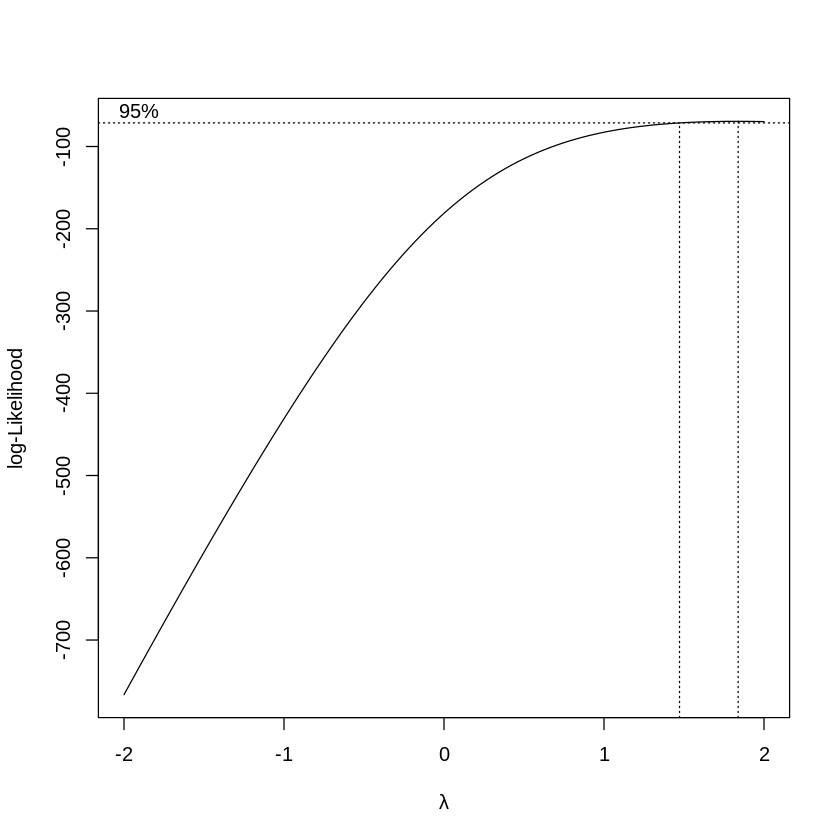

In [ ]:
library(MASS)
boxcox_result=boxcox(third_model)

In [ ]:
# Extract the best lambda value from Box-Cox results
best_lambda <- boxcox_result$x[which.max(boxcox_result$y)]
print(best_lambda)

[1] 1.838384


Best lambda of 1.84 suggests a box cox transformation using this lambda

In [ ]:
fourth_model= lm((((log(shifted_dividends))**best_lambda) - 1)/best_lambda ~ log(shifted_debtRepaid)+ log(shifted_debtChange), data=data)
# fourth_model= lm((((log(shifted_dividends))**best_lambda) - 1)/best_lambda ~ (shifted_debtRepaid)+ (shifted_debtChange), data=data)

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


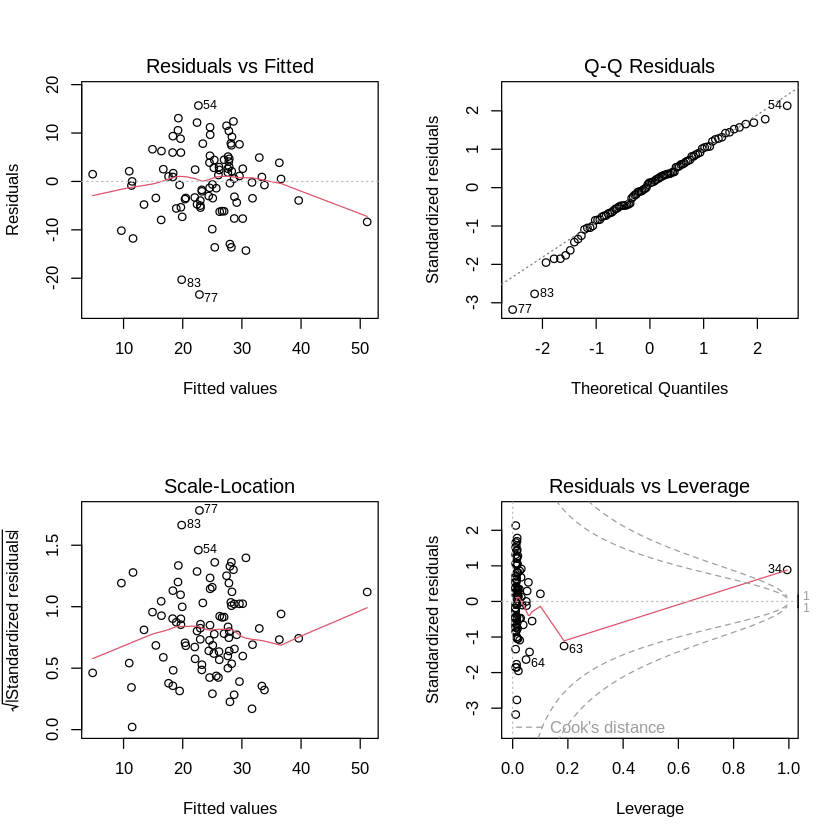

In [ ]:
par(mfrow = c(2,2))
plot(fourth_model)

Forth model has better residual plots with data pionts scattered somewhat evenly accross the horizontal.
Also points on the QQ plot mostly lie on the reference line.

Add Shapiro-wilk normailty for more confidence in the model

In [ ]:
library(MASS)

shapiro.test(fourth_model$residuals)


	Shapiro-Wilk normality test

data:  fourth_model$residuals
W = 0.98263, p-value = 0.2474


In [ ]:
install.packages("moments") # needed for skewness


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(moments)# needed for skewness
skewness(fourth_model$residuals)

[1] -0.3505995

Skewness tests result (-0.35) being less than 0.5 shows a normal symmetry, further attesting to our model adequacy

## Confidence Interval

In [ ]:
confint(fourth_model, level = 0.95)

,2.5 %,97.5 %
(Intercept),-61.4569911,-7.505537
log(shifted_debtRepaid),4.4869365,7.088076
log(shifted_debtChange),-0.8555247,2.555354


## Model Adecuacy Check

### Mean of residuals

In [ ]:
mean(fourth_model$residuals)

[1] -2.712766e-16

Mean of residuals (-2.71276610808405e-16) nearly zero means model passes this test

### Multicolinearity inspection



In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”


In [ ]:
library(car)
vif(fourth_model)

log(shifted_debtRepaid) log(shifted_debtChange) 
               1.072396                1.072396

VIF values around 1 indicates little to Zero multicolinearity, that is, the regressors are not correlated

### Lack of fit test

In [ ]:
anova(third_model, fourth_model)

Warning message in anova.lmlist(object, ...):
“models with response ‘"((log(shifted_dividends))^best_lambda - 1)/best_lambda"’ removed because response differs from model 1”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(debtRepaid),1,91.98950,91.989503,53.127114,9.586375e-10
log(debtChange),1,12.04748,12.047478,6.957835,1.069525e-02
Residuals,58,100.42690,1.731498,NA,NA


Lack of fit test using the anova() function not applicable here since the response variable has been transformed

### Breusch-Pagan Test

In [ ]:
##. Breusch-Pagan Test
install.packages('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
library(lmtest)
bptest(fourth_model)


	studentized Breusch-Pagan test

data:  fourth_model
BP = 0.37812, df = 2, p-value = 0.8277


 p-value (0.8277) is much greater than 0.05 and suggests that homoscedasticity (or constant variance) is met

In [ ]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

